In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib
from scipy.interpolate import interp2d
import math


from phys_metrics import ParticleDataset4, total_energy, energy_resolution, get_assymetry, get_shower_width, assymetry, get_sparsity, width
from stat_metrics import energy_fraction, get_central_square, plotStd
%matplotlib inline

In [17]:
! pwd

/mnt/sayankotor/VAEResG


In [18]:
real_data = ParticleDataset4('cut_4_4.npz')
fake_data = ParticleDataset4('rmse_4_4.npz')
fake_data_metrics = ParticleDataset4('rmse_4_4_metrics.npz')
fake_data_vae = ParticleDataset4('VAE_4_4.npz')

In [19]:
a = real_data[:]["image"].numpy().reshape(29600, 4,4)
b = fake_data[:]["image"].numpy().reshape(29600, 4,4)
c = fake_data_metrics[:]["image"].numpy().reshape(29600, 4,4)
d = fake_data_vae[:]["image"].numpy().reshape(29600, 4,4)

In [20]:
from matplotlib import pyplot as plt
%matplotlib inline

def show_images(x):
    plt.figure(figsize=(28, 28 / 10 * (x.shape[0] // 10 + 1)))
    x = x.reshape(-1, 4, 4)
    for i in range(x.shape[0]):
        plt.subplot(x.shape[0] // 10 + 1, 10, i + 1)
        plt.imshow(x[i])
        #plt.title("%1.3f %1.3f %1.3f" %(data_x.cpu().data[i].numpy()[0], data_x.cpu().data[i].numpy()[1], data_x.cpu().data[i].numpy()[2]))
        plt.axis('off')
    plt.show()

## Реальные ##

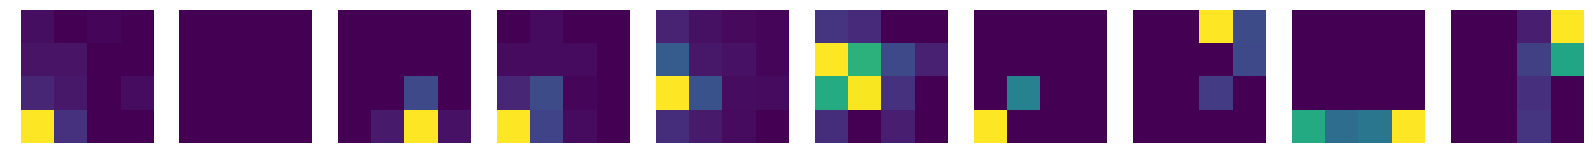

In [6]:
show_images(a[20:30])

## Генеренные ##

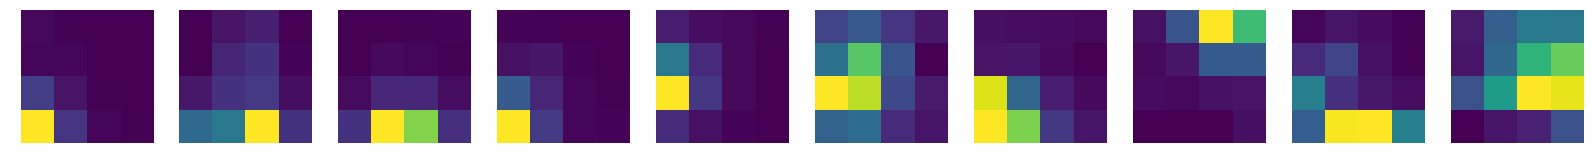

In [7]:
show_images(b[20:30])

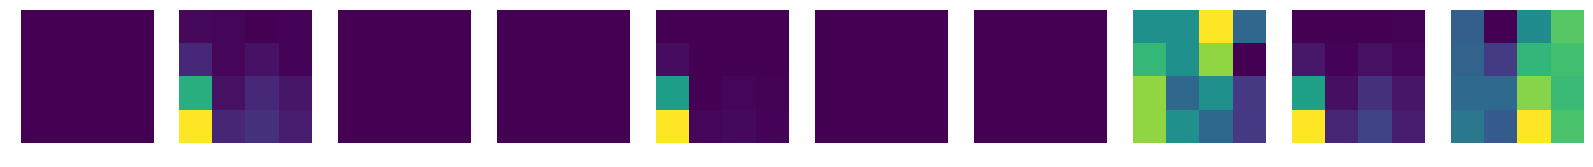

In [8]:
show_images(c[20:30])

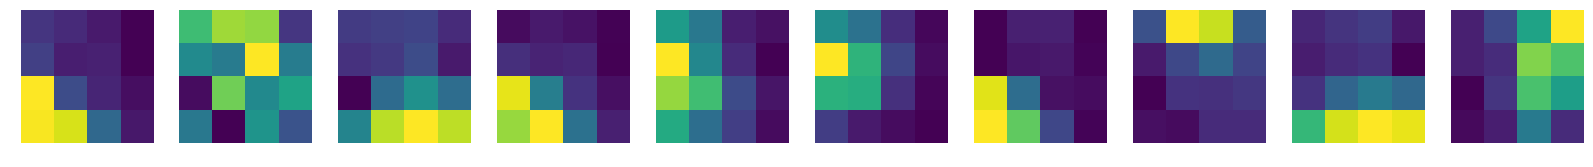

In [21]:
show_images(d[20:30])

**Total energy and energy resolution**

(29600, 16)
(29600, 16)


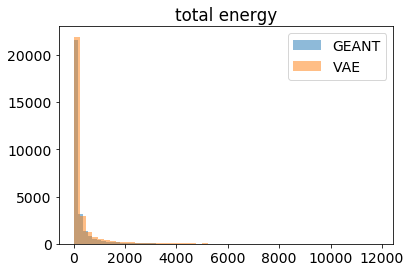

In [16]:
matplotlib.rcParams.update({'font.size': 14})
energy_real, energy_fake = total_energy(a.reshape(29600, 4, 4), b.reshape(29600, 4, 4), (4,4), is_show = False)
ett_real, ett_fake = energy_resolution(a.reshape(29600, 4, 4), b.reshape(29600, 4, 4), (4,4), real_data[:]["momentum"].numpy(), fake_data[:]["momentum"].numpy(), is_show = False)
#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)
plt.hist(energy_real, bins = 50, alpha = 0.5, label = 'GEANT')
plt.hist(energy_fake, bins = 50, alpha = 0.5, label = 'VAE')
plt.legend()
plt.title('total energy')

(29600, 16)
(29600, 16)


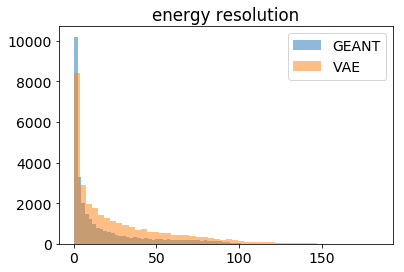

In [19]:
matplotlib.rcParams.update({'font.size': 14})
energy_real, energy_fake = total_energy(a.reshape(29600, 4, 4), b.reshape(29600, 4, 4), (4,4), is_show = False)
ett_real, ett_fake = energy_resolution(a.reshape(29600, 4, 4), b.reshape(29600, 4, 4), (,4), real_data[:]["momentum"].numpy(), fake_data[:]["momentum"].numpy(), is_show = False)
#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)
plt.hist(ett_real, bins = 50, alpha = 0.5, label = 'GEANT')
plt.hist(ett_fake, bins = 50, alpha = 0.5, label = 'VAE')
plt.legend()
plt.title('energy resolution')

**Energy fraction**

In [11]:
real_2[:3]

array([], shape=(3, 0), dtype=float32)

In [14]:
import pandas as pd
real_2 = pd.DataFrame(data=real_2).dropna()
real_4 = pd.DataFrame(data=real_4).dropna()
fake_2 = pd.DataFrame(data=fake_2).dropna()
fake_4 = pd.DataFrame(data=fake_4).dropna()

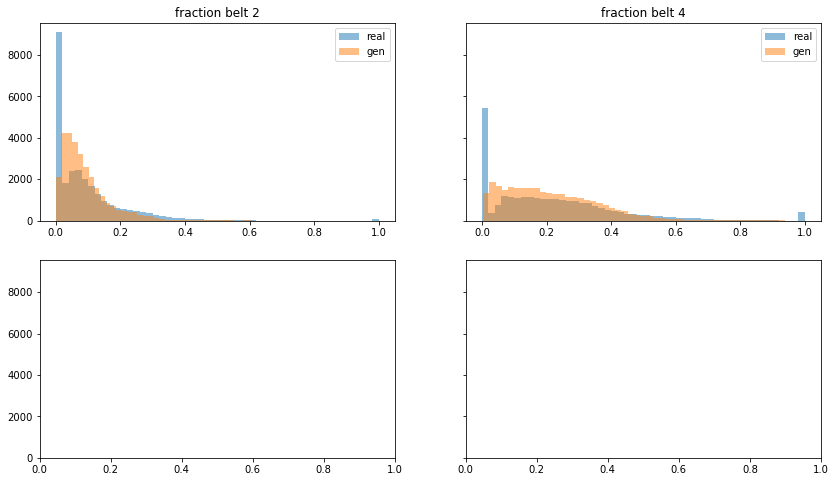

In [15]:
f, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(14,8), sharey=True)
ax1.hist(real_2, bins = 50, alpha = 0.5, label = 'real')
ax1.hist(fake_2, bins = 50, alpha = 0.5, label = 'gen')
ax1.set_title('fraction belt 2')
ax1.legend()
ax2.hist(real_4, bins = 50, alpha = 0.5, label = 'real')
ax2.hist(fake_4, bins = 50, alpha = 0.5, label = 'gen')
ax2.set_title('fraction belt 4')
ax2.legend()
#ax3.hist(real_6, bins = 50, alpha = 0.5, label = 'real')
#ax3.hist(fake_6, bins = 50, alpha = 0.5, label = 'gen')
#ax3.set_title('fraction belt 6')
#ax3.legend()
#ax4.hist(real_8, bins = 50, alpha = 0.5, label = 'real')
#ax4.hist(fake_8, bins = 50, alpha = 0.5, label = 'gen')
#ax4.set_title('fraction belt 8')
#ax4.legend()
plt.show()

## tune on metrics

(29600, 16)
(29600, 16)


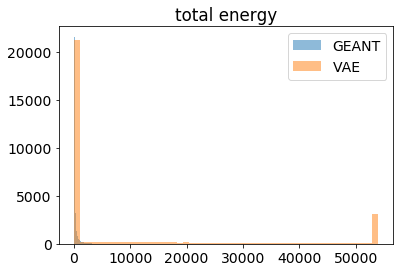

In [22]:
matplotlib.rcParams.update({'font.size': 14})
energy_real, energy_fake = total_energy(a.reshape(29600, 4, 4), c.reshape(29600, 4, 4), (4,4), is_show = False)
ett_real, ett_fake = energy_resolution(a.reshape(29600, 4, 4), c.reshape(29600, 4, 4), (4,4), real_data[:]["momentum"].numpy(), fake_data[:]["momentum"].numpy(), is_show = False)
#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)
plt.hist(energy_real, bins = 50, alpha = 0.5, label = 'GEANT')
plt.hist(energy_fake, bins = 50, alpha = 0.5, label = 'VAE')
plt.legend()
plt.title('total energy')

(29600, 16)
(29600, 16)


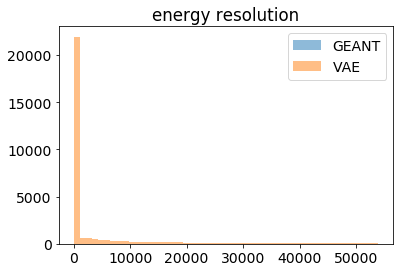

In [28]:
matplotlib.rcParams.update({'font.size': 14})
energy_real, energy_fake = total_energy(a.reshape(29600, 4, 4), c.reshape(29600, 4, 4), (4,4), is_show = False)
ett_real, ett_fake = energy_resolution(a.reshape(29600, 4, 4), c.reshape(29600, 4, 4), (4,4), real_data[:]["momentum"].numpy(), fake_data[:]["momentum"].numpy(), is_show = False)
#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)
plt.hist(ett_real, bins = 50, alpha = 0.5, label = 'GEANT')
plt.hist(ett_fake, bins = 50, alpha = 0.5, label = 'VAE')
plt.legend()
plt.title('energy resolution')

(29600, 16)
(29600, 16)


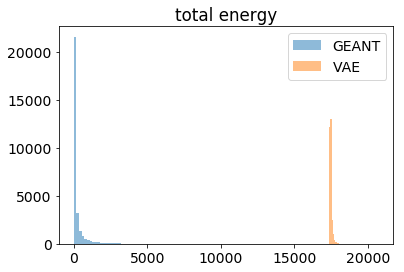

In [23]:
matplotlib.rcParams.update({'font.size': 14})
energy_real, energy_fake = total_energy(a.reshape(29600, 4, 4), d.reshape(29600, 4, 4), (4,4), is_show = False)
ett_real, ett_fake = energy_resolution(a.reshape(29600, 4, 4), d.reshape(29600, 4, 4), (4,4), real_data[:]["momentum"].numpy(), fake_data[:]["momentum"].numpy(), is_show = False)
#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)
plt.hist(energy_real, bins = 50, alpha = 0.5, label = 'GEANT')
plt.hist(energy_fake, bins = 50, alpha = 0.5, label = 'VAE')
plt.legend()
plt.title('total energy')

(29600, 16)
(29600, 16)


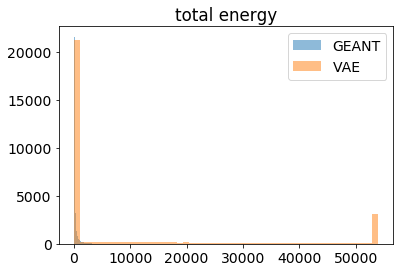

In [29]:
matplotlib.rcParams.update({'font.size': 14})
energy_real, energy_fake = total_energy(a.reshape(29600, 4, 4), c.reshape(29600, 4, 4), (4,4), is_show = False)
ett_real, ett_fake = energy_resolution(a.reshape(29600, 4, 4), c.reshape(29600, 4, 4), (4,4), real_data[:]["momentum"].numpy(), fake_data[:]["momentum"].numpy(), is_show = False)
#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)
plt.hist(energy_real, bins = 50, alpha = 0.5, label = 'GEANT')
#plt.hist(energy_fake, bins = 50, alpha = 0.5, label = 'VAE')
plt.legend()
plt.title('total energy')